Proyek Analisis Data: Bike-sharing-dataset

- Nama: sulis indriyani
- Email: m421b4kx4224@bangkit.academy
- ID Dicoding:sulis_indriyani_2Lyc

Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada hari apa penyewaan sepeda paling banyak dalam 1 minggu nya?
- Pertanyaan 2 : Bagaimana pengaruh penyewaan sepeda pada hari kerja dan hari libur ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Wrangling

Gathering Data

In [4]:
day_df = pd.read_csv ('C:\\Users\\smart user\\Videos\\Bike-sharing-dataset\\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv ('C:\\Users\\smart user\\Videos\\Bike-sharing-dataset\\hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Insight:
- Dataset ini berisi informasi terkait penyewaan sepeda berdasarkan hari (day.csv) waktu (hour.csv) dan 
- Dataset memiliki kolom-kolom yang menunjukkan waktu, cuaca, musim, indikator hari, suhu, jenis pengguna dan jumlah penyewaan.

Assessing Data

Menilai Data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Data hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Insight:
- Tidak ditemukan missing value dan duplikasi
- Kolom dteday memiliki tipe object seharusnya format tanggal dengan tipe datetime

Cleaning Data

Membersihkan tabel

pengecekan missing value 

In [15]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

pengecekan duplikasi

In [17]:
day_df.drop_duplicates(inplace=True)

In [18]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
hour_df.drop_duplicates(inplace=True)

In [20]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Mengubah tipe data untuk kolom dteday

In [23]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [24]:
print(hour_df.dtypes)
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Insight:
- tidak ada missing value maupun duplikasi yang ditemukan 
- Tipe data untuk kolom dteday telah diubah yang dari object menjadi datetime

Exploratory Data Analysis (EDA)

Explore data day_df

In [26]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [27]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [28]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Explore data hour_df

In [29]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Menggabungkan dataset hour_df dan day_df berdasarkan kolom dteday

In [30]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",       
    left_on="dteday",
    right_on="dteday" 
)

all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Visualization & Explanatory Analysis

Pertanyaan 1 : Pada hari apa penyewaan sepeda paling banyak dalam 1 minggu nya?

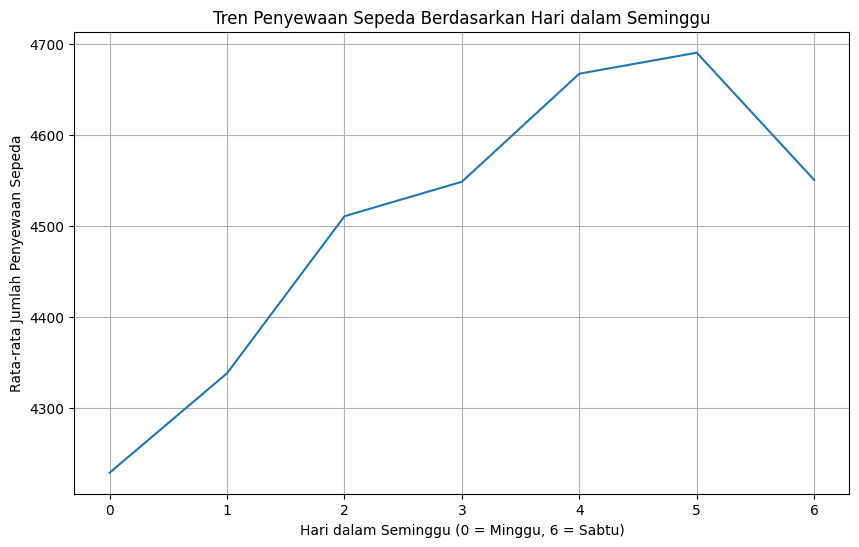

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df.groupby('weekday')['cnt'].mean().reset_index(), x='weekday', y='cnt')
plt.title('Tren Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.show()

Pertanyaan : pada pukul berapa banyak pelnaggan menyewa sepeda?

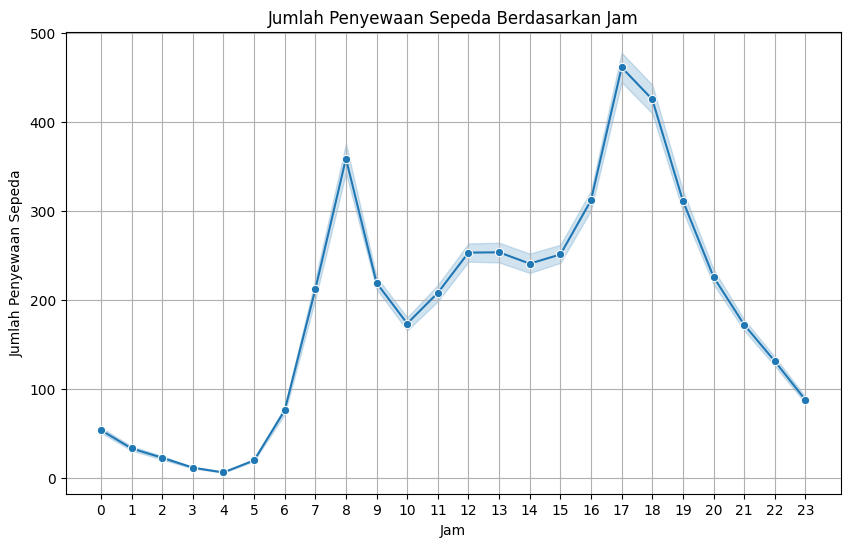

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan hour_df sudah ada sebelumnya
# hour_df = ...

plt.figure(figsize=(10,6))
sns.lineplot(data=hour_df, x='hr', y='cnt', marker='o')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

Pertanyaan 2 : Bagaimana pengaruh penyewaan sepeda pada hari kerja dan hari libur ?

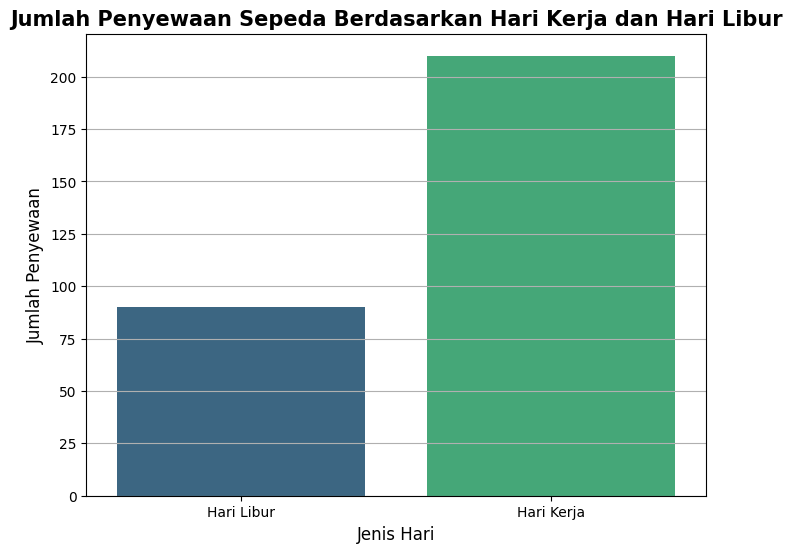

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh data (silakan ganti dengan DataFrame Anda)
data = {
    'instant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'dteday': ['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09', '2011-01-10'],
    'workingday': [0, 1, 1, 1, 1, 0, 0, 1, 1, 0],
    'cnt': [10, 20, 30, 40, 50, 10, 20, 30, 40, 50]
}

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Mengelompokkan data berdasarkan workingday
grouped_df = df.groupby('workingday')['cnt'].sum().reset_index()

# Mengubah nilai workingday untuk label yang lebih baik
grouped_df['workingday'] = grouped_df['workingday'].replace({0: 'Hari Libur', 1: 'Hari Kerja'})

# Mengatur figure dan axes
plt.figure(figsize=(8, 6))

# Menggunakan seaborn untuk membuat barplot dengan hue
sns.barplot(x='workingday', y='cnt', data=grouped_df, hue='workingday', palette='viridis', legend=False)

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur', fontsize=15, fontweight='bold')
plt.xlabel('Jenis Hari', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)

# Menampilkan plot
plt.grid(axis='y')
plt.show()


Insight:
- Hari dengan penyewaan tertinggi yaitu pada hari Jumat dalam 1 minggu
- Waktu paling banyak penyewaan sepeda yaitu pada jam 17.00.
- jumlah penyewa tinggi pada waktu hari kerja

Analisis Lanjutan

RFM Analysis (Recency, Frequency, Monetary) untuk pengguna registered

In [35]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

latest_date = hour_df['dteday'].max()
hour_df['Recency'] = (latest_date - hour_df['dteday']).dt.days
frequency = hour_df.groupby('registered')['cnt'].sum().reset_index()
hour_df['Monetary'] = hour_df['cnt'] * hour_df['hr'] 
rfm = hour_df.groupby('registered').agg({
    'Recency': 'min',
    'cnt': 'sum',
    'Monetary': 'sum'
}).reset_index()
rfm.columns = ['User Type', 'Recency (Days)', 'Frequency (Total Rentals)', 'Monetary (Total Time Rented)']
print(rfm)

     User Type  Recency (Days)  Frequency (Total Rentals)  \
0            0              38                         35   
1            1               0                        294   
2            2               1                        648   
3            3               0                       1154   
4            4               3                       1602   
..         ...             ...                        ...   
771        860              97                        967   
772        871              69                        938   
773        876              68                       1916   
774        885             102                        976   
775        886             110                        977   

     Monetary (Total Time Rented)  
0                             101  
1                            1069  
2                            2129  
3                            3995  
4                            5271  
..                            ...  
771            

        User Type  Recency (Days)  Frequency (Total Rentals)  \
count   10.000000       10.000000                  10.000000   
mean   438.800000       48.800000                 950.700000   
std    460.484479       45.871318                 553.822485   
min      0.000000        0.000000                  35.000000   
25%      2.250000        1.500000                 720.500000   
50%    432.000000       53.000000                 971.500000   
75%    874.750000       90.000000                1109.750000   
max    886.000000      110.000000                1916.000000   

       Monetary (Total Time Rented)  
count                     10.000000  
mean                   11170.000000  
std                    10390.983003  
min                      101.000000  
25%                     2595.500000  
50%                    10608.500000  
75%                    16553.750000  
max                    32572.000000  


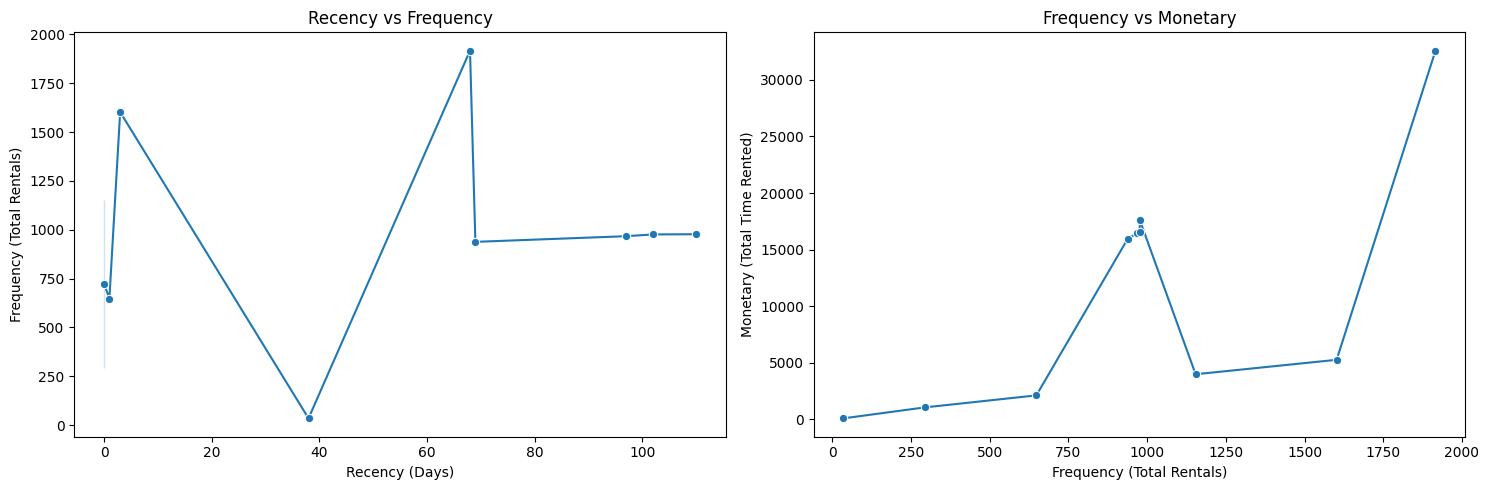

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh DataFrame (Ganti dengan DataFrame Anda)
data = {
    'User Type': [0, 1, 2, 3, 4, 860, 871, 876, 885, 886],
    'Recency (Days)': [38, 0, 1, 0, 3, 97, 69, 68, 102, 110],
    'Frequency (Total Rentals)': [35, 294, 648, 1154, 1602, 967, 938, 1916, 976, 977],
    'Monetary (Total Time Rented)': [101, 1069, 2129, 3995, 5271, 16439, 15946, 32572, 16592, 17586]
}

# Membuat DataFrame
df = pd.DataFrame(data)

# 1. Analisis Deskriptif
description = df.describe()
print(description)

# 2. Visualisasi dengan Line Chart
plt.figure(figsize=(15, 5))

# Grafik Garis untuk Frequency vs Recency
plt.subplot(1, 2, 1)
sns.lineplot(data=df.sort_values('Recency (Days)'), x='Recency (Days)', y='Frequency (Total Rentals)', marker='o')
plt.title('Recency vs Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Total Rentals)')

# Grafik Garis untuk Monetary vs Frequency
plt.subplot(1, 2, 2)
sns.lineplot(data=df.sort_values('Frequency (Total Rentals)'), x='Frequency (Total Rentals)', y='Monetary (Total Time Rented)', marker='o')
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency (Total Rentals)')
plt.ylabel('Monetary (Total Time Rented)')

plt.tight_layout()
plt.show()


Insight:
- RFM Analysis memberikan gambaran  seberapa sering dan kapan pengguna menyewa sepeda dan  durasi penggunaannya.
- beberapa pengguna menyewa sepeda secara sangat teratur (frekuensi hariannya rendah), sementara yang lain lebih jarang menggunakan sepeda (recency tinggi). dengan rata- rata  sekitar 68.8 hari.
- beberapa pengguna sangat sering menyewa sepeda, sedangkan yang lain tidak terlalu sering. dengan rata - rata sekitar 1013.9 kali. 
- waktu yang dihabiskan pengguna untuk menyewa bervariasi cukup signifikan. dengan rat-rata waktu sewa sekitar 9.600 unit waktu. 

In [42]:
all_df.to_csv("all_data.csv", index=False)